In [1]:
# Keras 라이브러리 불러오기

# MNIST Dataset을 가져오기 위한 라이브러리
from keras.datasets import mnist

# 딥 러닝 모델을 순차적으로 만들기 위한 라이브러리
from keras.models import Sequential
#from keras.models import Model

# Dense : MLP층, Activation : 활성화 함수
from keras.layers import Activation, Dense

import numpy as np # 행렬 계산을 위한 넘파이 라이브러리
import matplotlib.pyplot as plt # 그래프를 그리기 위한 MatPlotLib 라이브러리
from PIL import Image # MatPlotLib 라이브러리와 같이 이미지 처리를 위한 Image 라이브러리

Using TensorFlow backend.


In [0]:
# Dataset 구성

# MNIST Dataset이 저장되어 있는 어딘가에서 MNIST Dataset을 가져옵니다
# _ : 가져온 값을 저장하지 않을 때 사용, DAE는 y값 (Label) 이 필요 없습니다.
(x_train, _), (x_test, _) = mnist.load_data() 

# Dataset 전처리

# 픽셀 값을 0~255 범위에서 0~1 범위로 낮춰줍니다 / 오차 값을 적절한 범위에 맞추기 위함
# astype('float32') : int(정수)를 float(실수)로 바꾸어줍니다.
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

print('x_train :', np.shape(x_train))

11493376/11490434 [==============================] - 1s 0us/step
x_train : (60000, 784)


In [0]:
# 정규 분포로 생성된 노이즈를 원래 이미지에 더하여 노이즈가 낀 데이터를 생성합니다
# 노이즈는 평균 0.5, 표준편차 0.5 의 정규 분포로 생성됩니다

np.random.seed(1337) # 랜덤 값을 만들어주기 위한 seed

# Training Dataset에 대한 노이즈 낀 Dataset 생성
noise = np.random.normal(loc=0.5, scale=0.5, size=x_train.shape)
x_train_noisy = x_train + noise

# Test Dataset에 대한 노이즈 낀 Dataset 생성
noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)
x_test_noisy = x_test + noise

# 노이즈 낀 Dataset의 각 픽셀 값이 1을 넘으면 1로, 0보다 작으면 0으로 해줍니다
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [0]:
# Encoder 모델 구성
encoder = Sequential(name="Encoder")
encoder.add(Dense(256, input_shape = [28*28], activation='relu'))
encoder.add(Dense(128, activation='relu'))
encoder.add(Dense(64, activation='relu'))
encoder.add(Dense(16, activation='relu'))
encoder.add(Dense(4))

encoder.summary() # Encoder 모델 구조 확인

# Decoder 모델 구성
decoder = Sequential(name="Decoder")
decoder.add(Dense(16, input_shape = [4], activation='relu'))
decoder.add(Dense(64, activation='relu'))
decoder.add(Dense(128, activation='relu'))
decoder.add(Dense(256, activation='relu'))
decoder.add(Dense(784, activation='relu'))

decoder.summary() # Decoder 모델 구조 확인

# 두 모델을 합쳐 하나의 새로운 모델을 만들 수 있습니다
# Autoencoder = Encoder + Decoder
autoencoder = Sequential(name="Autoencoder")
autoencoder.add(encoder)
autoencoder.add(decoder)

# 위와 동일 코드:
# autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()




Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 68        
Total params: 243,220
Trainable params: 243,220
Non-trainable params: 0
_________________________________________________________________
Model: "Decoder"
_________________________________________________________________
Layer (type)                 Outp

In [0]:
# 모델 학습 과정을 설정합니다

# loss는 목적 함수를 의미하며, 회귀 문제이므로 MSE를 사용합니다
# optimizer는 학습 방법을 의미하며, 너무 느린 SGD 대신에 Adam을 사용합니다
# metrics는 학습 도중 화면에 어떤 값을 띄울까를 결정합니다
autoencoder.compile(loss='mse', optimizer='adam')

In [0]:
# Autoencoder 모델을 학습시킵니다

autoencoder.fit(x_train_noisy, x_train, # 입력 : 노이즈 낀 데이터 / 출력 : 기존 데이터
                validation_data=(x_test_noisy, x_test), # Validation을 Test dataset으로 해줍니다 
                epochs=20, # Epoch 수 설정
                batch_size=64 # Mini-batch 크기 설정
                )




Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 10s 170us/step - loss: 0.0624 - val_loss: 0.0476
Epoch 2/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0444 - val_loss: 0.0419
Epoch 3/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0401 - val_loss: 0.0388
Epoch 4/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0383 - val_loss: 0.0379
Epoch 5/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0368 - val_loss: 0.0360
Epoch 6/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0356 - val_loss: 0.0353
Epoch 7/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0350 - val_loss: 0.0353
Epoch 8/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0344 - val_loss: 0.0352
Epoch 9/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0338 - val_loss: 0.

(900, 784)
(30, 30, 28, 28)
(300, 3, 28, 28)
(30, 30, 28, 28)
(840, 840)


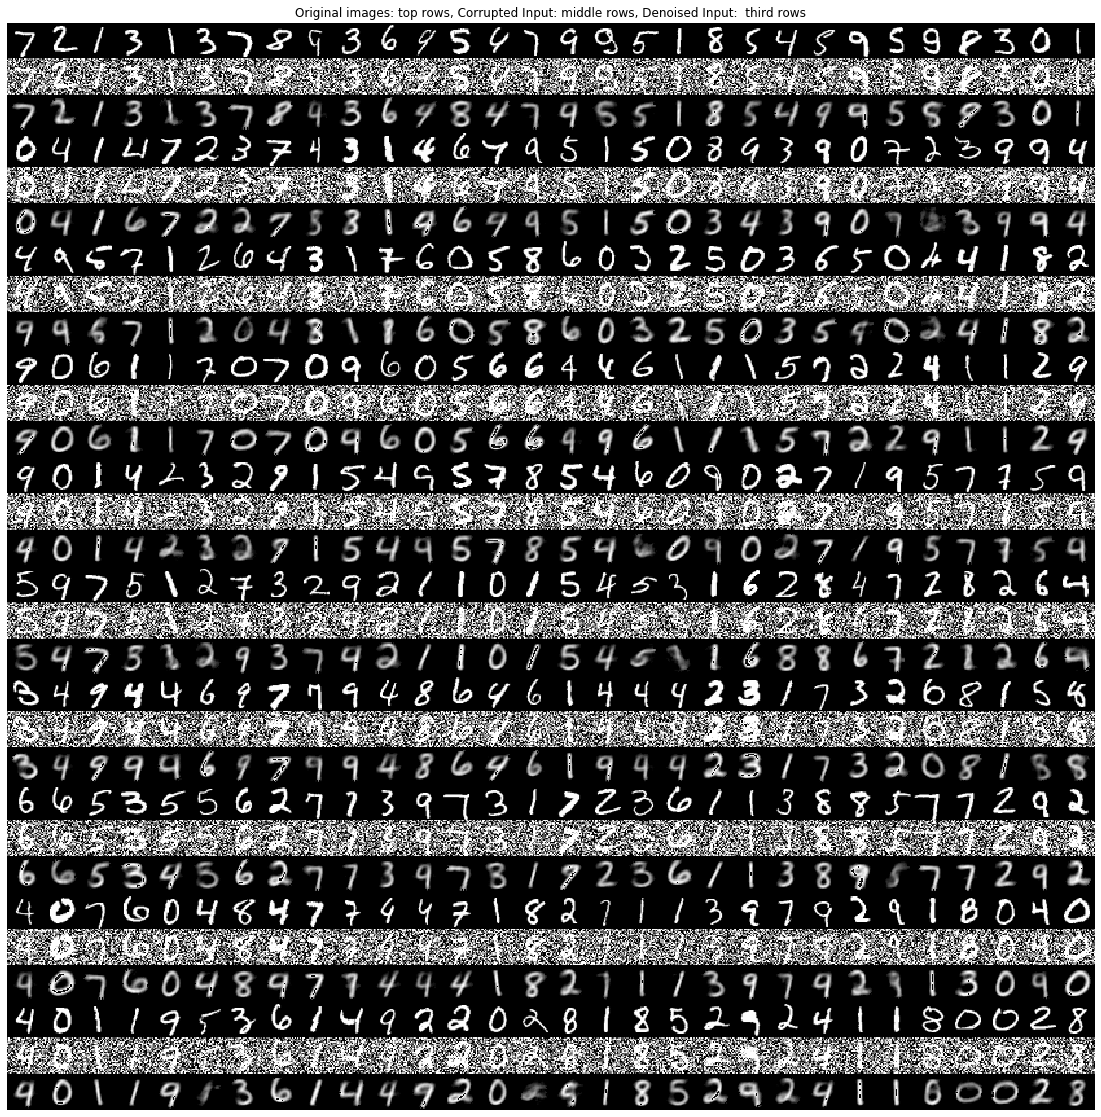

In [0]:
# 실제로 사용해봅시다

# 노이즈 낀 데이터로부터 출력을 받습니다
x_decoded = autoencoder.predict(x_test_noisy)

# Display the 1st 8 corrupted and denoised images
rows, cols = 10, 30
num = rows * cols

# 원본 / 노이즈 추가 / 모델 출력 300장씩 이어붙이기 (900 * 784)
imgs = np.concatenate([x_test[:num], x_test_noisy[:num], x_decoded[:num]])
print(np.shape(imgs))

# 784 -> 28 * 28 / 900 -> 30 * 30 (30 * 30 * 28 * 28)
imgs = imgs.reshape((rows * 3, cols, 28, 28))
print(np.shape(imgs))

# 30 * 30 -> 300 * 3
# split : axis (0, 1, 2, ...)에 따라 rows(10)개로 나눔 (30 * 10 * 3 * 28 * 28)
# vstack : 맨 앞 차원으로 이어붙힘 (300 * 3 * 28 * 28)
# => 원본 / 노이즈 / 출력을 한줄씩 번갈아 나오게 한다
imgs = np.vstack(np.split(imgs, rows, axis=1))
print(np.shape(imgs))

# (300 * 3 * 28 * 28) -> (30 * 30 * 28 * 28)
imgs = imgs.reshape((rows * 3, -1, 28, 28))
print(np.shape(imgs))

# 이미지 출력을 위해 차원수를 2로 줄여준다
# (30 * 30 * 28 * 28) -> (840, 840)
imgs = np.vstack([np.hstack(i) for i in imgs])
print(np.shape(imgs))

# 0 ~ 1 => 0 ~ 255 / 실수 => 정수
imgs = (imgs * 255).astype(np.uint8)

plt.rcParams["figure.figsize"] = (20,20) # 출력할 이미지 크기 설정
plt.figure()
plt.axis('off') # 축을 안보이게 한다

# 출력 된 이미지 제목 설정, 이미지 위에 나타난다
plt.title('Original images: top rows, '
          'Corrupted Input: middle rows, '
          'Denoised Input:  third rows')

# 이미지를 흑백(cmap='gray')으로 출력한다
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show() # 이미지 출력

In [0]:
# 본인의 구글 드라이브 → 지금 실행중인 코드

# google.colab.drive : 구글 드라이브에서 파일을 가져오기 위한 코드를 담고 있다.
from google.colab import drive

# 본인의 구글 드라이브를 '/gdrive' 라는 경로로 하여 쓸 수 있다.
drive.mount('/gdrive', force_remount=True)

In [0]:
# 모델은 h5 파일 형태로 저장됩니다
autoencoder.save('/gdrive/My Drive/MNIST_MLP_DAE.h5')

# 모델을 불러오기 위해 지워줍니다
del autoencoder

# 저장되어 있는 모델을 불러오기 위한 load_model 함수
from keras.models import load_model

# 'model' 에 해당 모델을 불러옵니다
model = load_model('/gdrive/My Drive/MNIST_MLP_DAE.h5')